In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import plotly.express as px
import pandas as pd
import json
import plotly.graph_objects as go  # Ensure graph_objects is imported
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pickle
from matplotlib.colors import ListedColormap

In [16]:
df=pd.read_excel("/home/kamal/Desktop/IEEEBigData/Dataset/Aviation_Fatalities.xlsx")

In [17]:
# Assuming df is your DataFrame
filtered_df = df[(df['US air carrier category'] == 'Large airlines') & (df['Year'] > 2020)]

In [18]:
mean_fatal_accident_rate_air = filtered_df['Fatal accident rate per million miles flown'].mean()
mean_fatal_accident_rate_air = mean_fatal_accident_rate_air / 1000000

In [19]:
df=pd.read_excel("/home/kamal/Desktop/IEEEBigData/Dataset/Ground_Fatalities.xlsx")

In [20]:
# Assuming df is your DataFrame
filtered_df = df[(df['State'] == 'Tennessee') & (df['Year'] > 2020)]

In [21]:
mean_fatal_accident_rate_ground = filtered_df['Traffic deaths - per 100,000,000 vehicle miles'].mean()
mean_fatal_accident_rate_ground = mean_fatal_accident_rate_ground / 100000000

In [22]:
df=pd.read_csv("/home/kamal/Desktop/IEEEBigData/Dataset/VSL_data.csv")

In [23]:
filtered_df = df[(df['Base Year'] > 2020) & (df['Base Year'] < 2023)]

In [24]:
mean_VSL = filtered_df['Value (million $)'].mean()

In [25]:
# Generate distance values from 50 to 500
distance_values = list(range(50, 501))

# Calculate risk values
risk_ground_values = [distance * mean_VSL * mean_fatal_accident_rate_ground for distance in distance_values]
risk_air_values = [distance * mean_VSL * mean_fatal_accident_rate_air for distance in distance_values]

# Create the DataFrame
df = pd.DataFrame({
    'distance': distance_values,
    'risk_ground': risk_ground_values,
    'risk_air': risk_air_values
})

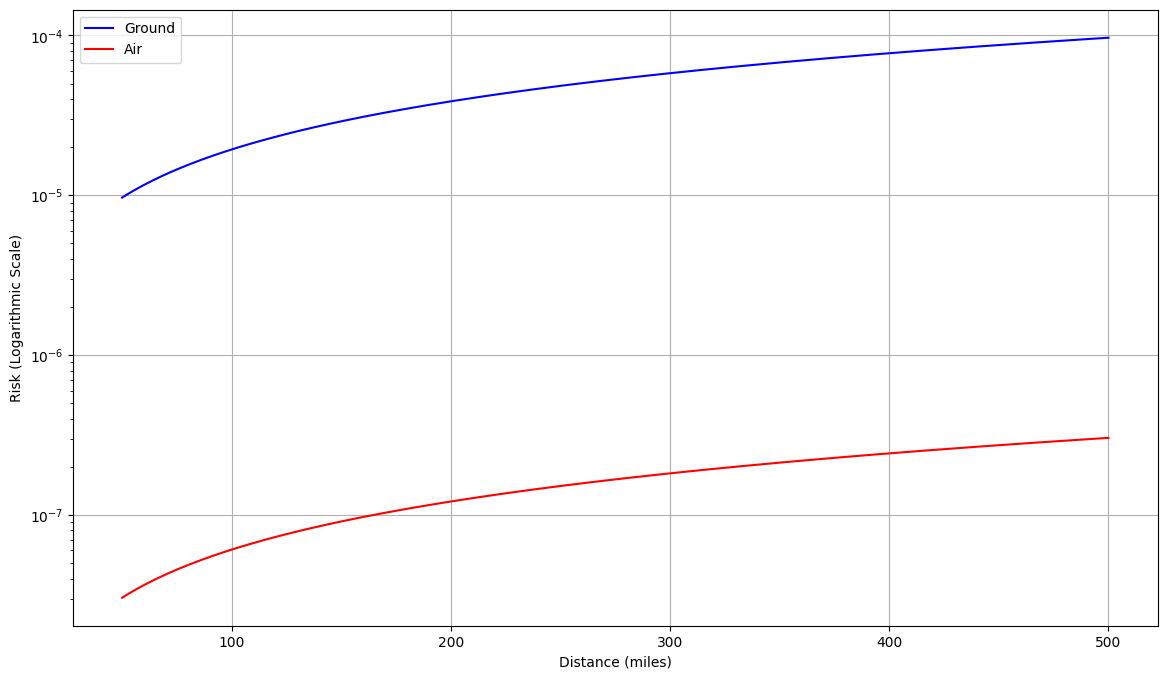

In [15]:
# Plotting with logarithmic scale
plt.figure(figsize=(14, 8))
plt.plot(df['distance'], df['risk_ground'], label='Ground', color='blue')
plt.plot(df['distance'], df['risk_air'], label='Air', color='red')
plt.xlabel('Distance (miles)')
plt.ylabel('Risk (Logarithmic Scale)')
plt.yscale('log')
# plt.title('Risk vs Distance (Logarithmic Scale)')
plt.legend()
plt.grid(True)
plt.show()